Summary : WFH/O? is an application to optimize the carbon footprint/ energy of a person to whether working from home or at office.

Background : 
Teleworking becomes popular during the COVID-19 pandemic and it becomes one of working styles adapted around the world.
Some studies found that teleworking reduce the CO2 emission because less traveling but some studies also suggested that actually the total energy / CO2 emission doesn't reduce because when the person working from home that person may consume more electricity at home due to utilities and lifestyles but in still many countries the electricity comes with CO2 emission, thus more CO2 emission is emitted. On the other hand, working at office where many people presents and having more efficient energy system may consume less energy per person. Furthermore, the HVAC energy consumption is very dependent with temperature outside in which due to climate change the fluctuations become extreme, when it's hot season it's hotter and when it's cold season it can be colder. Therefore, from the perspective of energy and CO2 emission, the options stay at home or working at office may impact one's carbon footprint.

Solution :
IBM PAIRS data provides temperature of certain region/coordinate point which can be used and couple with electricity data from an office building (this is also can be provided using IBM services IoT). Combines with ML model, it can be used to predict the electricity meter given by certain temperature forecast. Then it combines with personal carbon footprint or some simple metric like electricity meter of one's house and estimation CO2 emission during commuting, the algorithm optimize the options of working from home or at office. The output is a recommendation whether one should be working from home or working at office. Later it can be integrated with IBM Cloud and IBM Cloud Push Notifications as a mobile application.

Disclaimer :
This app idea only comes from energy perspective, the other aspects such as productivity, harsh weather, etc. isn't involved yet thus the accuracy of the decision maybe not good. The HVAC energy is also assumed to be temperature-only whereas humidity, etc. are also affected the variable.

Refaldi Putra, The University of Tokyo

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
!pip install opendatasets

  Using cached opendatasets-0.1.20-py3-none-any.whl (14 kB)
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [3]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/teeyee314/ucf-building-meter-reading')

Skipping, found downloaded files in "./ucf-building-meter-reading" (use force=True to force download)


In [5]:
!ls -al

total 1264
drwxrwxrwx 13 jovyan users    4096 Sep 27 08:40 .
drwxr-xr-x  1 root   root     4096 Jul  8 21:49 ..
drwxr-xr-x  5 jovyan users    4096 Sep 26 00:18 .cache
drwxr-xr-x  3 nobody users    4096 Sep  7 20:38 cfcdir
-rw-r--r--  1 jovyan users 1227331 Sep 27 08:40 CFC_v1.ipynb
-rw-r--r--  1 jovyan users      43 Sep 27 21:05 .condarc
drwxr-xr-x  3 jovyan users    4096 Sep 23 00:48 .config
drwxr-xr-x  2 jovyan users    4096 Sep 26 07:26 downloads
drwxr-xr-x  2 jovyan users    4096 Sep 23 00:48 .ipynb_checkpoints
drwxr-xr-x  5 jovyan users    4096 Sep 23 00:47 .ipython
drwxr-xr-x  3 jovyan users    4096 Sep 26 00:02 .jupyter
drwxr-xr-x  2 jovyan users    4096 Sep 27 07:25 .kaggle
drwxr-xr-x  3 jovyan users    4096 Sep 23 00:45 .local
dr-xr-xr-x  8 jovyan users    4096 Aug 28 01:24 shared_read_only
-rwxr-xr-x  1 jovyan users    1786 Sep 27 21:05 SPLASH.md
drwxr-xr-x  2 jovyan users    4096 Sep 27 07:25 ucf-building-meter-reading


In [6]:
!ls -al ./ucf-building-meter-reading

total 33276
drwxr-xr-x  2 jovyan users     4096 Sep 27 07:25 .
drwxrwxrwx 13 jovyan users     4096 Sep 27 08:40 ..
-rw-r--r--  1 jovyan users 33926408 Sep 27 07:25 site0.ft


In [9]:
!pip install pyarrow

  Using cached pyarrow-5.0.0-cp38-cp38-manylinux2014_x86_64.whl (23.6 MB)


In [10]:
UCF_data = pd.read_feather('/home/jovyan/ucf-building-meter-reading/site0.ft')

In [11]:
UCF_data.head()

,timestamp,meter_reading,meter,building_id
0,2017-01-01 00:00:00,173.370300,0,0
1,2017-01-01 01:00:00,178.148209,0,0
2,2017-01-01 02:00:00,177.465652,0,0
3,2017-01-01 03:00:00,176.783096,0,0
4,2017-01-01 04:00:00,177.465652,0,0


In [12]:
UCF_data['building_id'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  90,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  67,
        77, 100,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  85,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  78,  79,  80,  81,  82,  83,  84,  86,  87,  88,
        89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 102, 103,
       104], dtype=int16)

In [14]:
#List of building_id for office type building
Office = [1,7,13,14,16,18,19,27,29,38,39,49,71,73,77,88,96]

In [28]:
UCF_data[UCF_data['building_id']==1].head()

,timestamp,meter_reading,meter,building_id
17518,2017-01-01 00:00:00,53.512718,0,1
17519,2017-01-01 01:00:00,52.420624,0,1
17520,2017-01-01 02:00:00,52.420624,0,1
17521,2017-01-01 03:00:00,54.331791,0,1
17522,2017-01-01 04:00:00,53.239697,0,1


In [29]:
# Check the length
len(UCF_data[UCF_data['building_id']==1])

17518

In [30]:
len(UCF_data[UCF_data['building_id']==7])

35036

In [31]:
len(UCF_data[UCF_data['building_id']==13])

35036

In [33]:
#it seems only id==1 has less data
[len(UCF_data[UCF_data['building_id']==i]) for i in Office]

[17518,
 35036,
 35036,
 35036,
 17518,
 17518,
 17518,
 17518,
 35036,
 17518,
 17518,
 17518,
 17518,
 17518,
 17518,
 17518,
 35036]

In [38]:
#The difference of lenght because there are 2 kinds of meter

In [120]:
# Let's the pick id 19 as the primary data for office energy
# It's Rehearsal Hall with area of 10743 sqft
# Assume for 10 people capacity
UCF_data[UCF_data['building_id']==19]

,timestamp,meter_reading,meter,building_id
332842,2017-01-01 00:00:00,174.735413,0,19
332843,2017-01-01 01:00:00,174.735413,0,19
332844,2017-01-01 02:00:00,169.274933,0,19
332845,2017-01-01 03:00:00,188.386627,0,19
332846,2017-01-01 04:00:00,178.011703,0,19
...,...,...,...,...
350355,2018-12-31 19:00:00,137.058090,0,19
350356,2018-12-31 20:00:00,139.242279,0,19
350357,2018-12-31 21:00:00,130.505508,0,19
350358,2018-12-31 22:00:00,138.150177,0,19


In [41]:
oneSec = timedelta(seconds=1)
iso8601 = '%Y-%m-%dT%H:%M:%SZ'

In [42]:
# Now data from PAIRS
import json

from ibmpairs import paw, authentication


PAIRS_API_KEY = '0w3WH7tLFGrPDynba26LF1BIyIDBvdSSF7mcsauWK3o' # Put your API key here. Important: Best practice is not to include secrets in source code.

PAIRS_SERVER   = 'https://pairs.res.ibm.com'

PAIRS_CREDENTIALS = authentication.OAuth2(api_key = PAIRS_API_KEY)

In [72]:
pointQueryJson = {
    'layers' : [
        {
            'type' : 'raster', 'id' : '49423' #ERA5 Temperature
        }
    ],
    'spatial' : {'type' : 'point', 'coordinates' : ['28.6', '-81.2']}, #Coordinate UCF
    'temporal' : {'intervals' : [{
        'start' : "2017-01-01T05:00:00Z", #Since UTC time, it needs to take 5 hours ahead
        'end' : "2019-01-01T04:00:00Z"
    }]}
}

In [73]:
pointQuery = paw.PAIRSQuery(pointQueryJson, PAIRS_SERVER, PAIRS_CREDENTIALS, authType='api-key')
pointQuery.submit()
pointQuery.vdf['value'] = pd.to_numeric(pointQuery.vdf['value'])

GeoPandas not available on your system. Cannot convert vector dataframe to GeoPandas dataframe.


In [43]:
weather_data = pointQuery.vdf.pivot_table(index = 'timestamp', columns = 'layerId', values = 'value').dropna()

In [79]:
pointQuery.vdf['timestamp']

0       2017-01-01 06:00:00+00:00
1       2017-01-01 07:00:00+00:00
2       2017-01-01 08:00:00+00:00
3       2017-01-01 09:00:00+00:00
4       2017-01-01 10:00:00+00:00
                   ...           
17514   2019-01-01 00:00:00+00:00
17515   2019-01-01 01:00:00+00:00
17516   2019-01-01 02:00:00+00:00
17517   2019-01-01 03:00:00+00:00
17518   2019-01-01 04:00:00+00:00
Name: timestamp, Length: 17519, dtype: datetime64[ns, UTC]

In [81]:
pointQuery.vdf['timestamp'].dt.tz_convert('US/Central')

0       2017-01-01 00:00:00-06:00
1       2017-01-01 01:00:00-06:00
2       2017-01-01 02:00:00-06:00
3       2017-01-01 03:00:00-06:00
4       2017-01-01 04:00:00-06:00
                   ...           
17514   2018-12-31 18:00:00-06:00
17515   2018-12-31 19:00:00-06:00
17516   2018-12-31 20:00:00-06:00
17517   2018-12-31 21:00:00-06:00
17518   2018-12-31 22:00:00-06:00
Name: timestamp, Length: 17519, dtype: datetime64[ns, US/Central]

In [82]:
Temperature_data = pd.DataFrame(pointQuery.vdf['timestamp'].dt.tz_convert('US/Central'))

In [84]:
Temperature_data['Temperature (K)'] = pointQuery.vdf['value']

In [86]:
Temperature_data

,timestamp,Temperature (K)
0,2017-01-01 00:00:00-06:00,288.403717
1,2017-01-01 01:00:00-06:00,288.215302
2,2017-01-01 02:00:00-06:00,287.787018
3,2017-01-01 03:00:00-06:00,286.906189
4,2017-01-01 04:00:00-06:00,286.200562
...,...,...
17514,2018-12-31 18:00:00-06:00,297.451599
17515,2018-12-31 19:00:00-06:00,296.951111
17516,2018-12-31 20:00:00-06:00,296.328400
17517,2018-12-31 21:00:00-06:00,295.693542


In [121]:
#Building the Dataframe
whole_data = pd.DataFrame(index = None)

In [122]:
whole_data

""


In [123]:
whole_data['timestamp'] = UCF_data[UCF_data['building_id']==19]['timestamp']

In [124]:
whole_data['electricity'] = UCF_data[UCF_data['building_id']==19]['meter_reading']/10 #Assume 10 occupants

In [125]:
whole_data

,timestamp,electricity
332842,2017-01-01 00:00:00,17.473541
332843,2017-01-01 01:00:00,17.473541
332844,2017-01-01 02:00:00,16.927494
332845,2017-01-01 03:00:00,18.838663
332846,2017-01-01 04:00:00,17.801170
...,...,...
350355,2018-12-31 19:00:00,13.705809
350356,2018-12-31 20:00:00,13.924228
350357,2018-12-31 21:00:00,13.050550
350358,2018-12-31 22:00:00,13.815018


In [126]:
whole_data=whole_data.reset_index(drop=True)

In [128]:
whole_data['temperature'] = Temperature_data['Temperature (K)'].iloc[:-1]

In [129]:
whole_data

,timestamp,electricity,temperature
0,2017-01-01 00:00:00,17.473541,288.403717
1,2017-01-01 01:00:00,17.473541,288.215302
2,2017-01-01 02:00:00,16.927494,287.787018
3,2017-01-01 03:00:00,18.838663,286.906189
4,2017-01-01 04:00:00,17.801170,286.200562
...,...,...,...
17513,2018-12-31 19:00:00,13.705809,297.411804
17514,2018-12-31 20:00:00,13.924228,297.451599
17515,2018-12-31 21:00:00,13.050550,296.951111
17516,2018-12-31 22:00:00,13.815018,296.328400


In [130]:
whole_data['norm_elec']=whole_data['electricity']/max(whole_data['electricity'])
whole_data['norm_temp']=whole_data['temperature']/max(whole_data['temperature'])

In [131]:
whole_data

,timestamp,electricity,temperature,norm_elec,norm_temp
0,2017-01-01 00:00:00,17.473541,288.403717,0.418848,0.938157
1,2017-01-01 01:00:00,17.473541,288.215302,0.418848,0.937544
2,2017-01-01 02:00:00,16.927494,287.787018,0.405759,0.936151
3,2017-01-01 03:00:00,18.838663,286.906189,0.451571,0.933286
4,2017-01-01 04:00:00,17.801170,286.200562,0.426702,0.930990
...,...,...,...,...,...
17513,2018-12-31 19:00:00,13.705809,297.411804,0.328534,0.967460
17514,2018-12-31 20:00:00,13.924228,297.451599,0.333770,0.967589
17515,2018-12-31 21:00:00,13.050550,296.951111,0.312827,0.965961
17516,2018-12-31 22:00:00,13.815018,296.328400,0.331152,0.963936


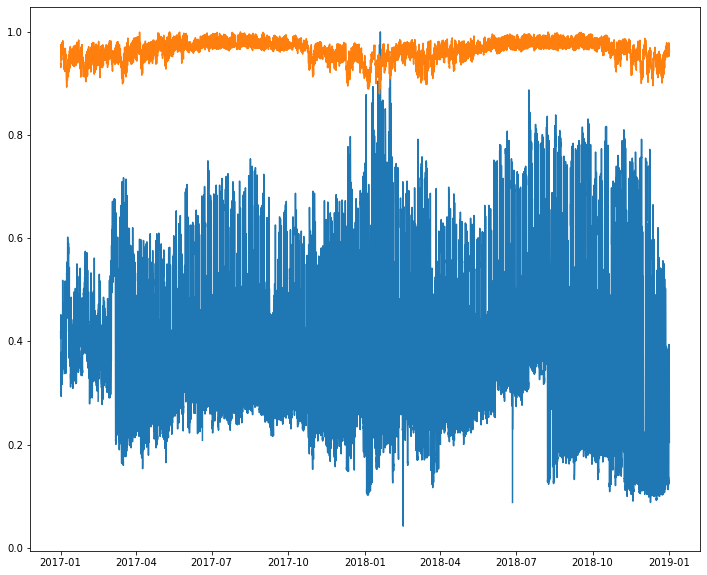

In [133]:
plt.plot(whole_data['timestamp'],whole_data['norm_elec'])
plt.plot(whole_data['timestamp'],whole_data['norm_temp'])
fig = plt.gcf()
fig.set_size_inches(12, 10)

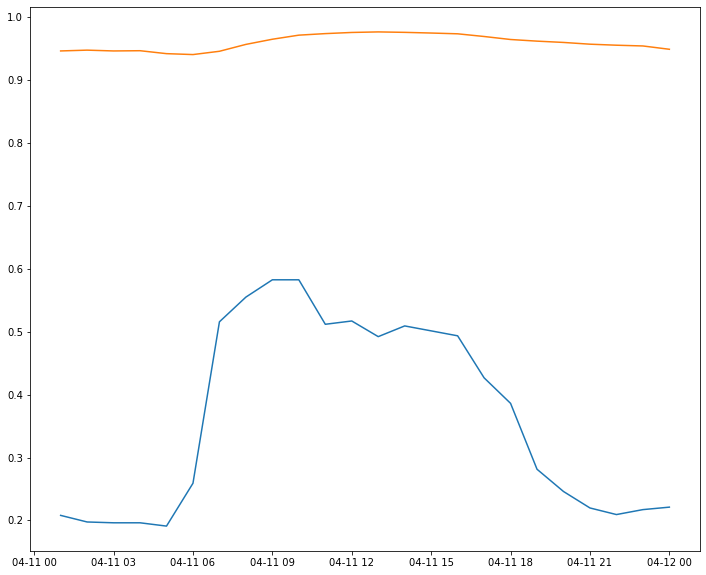

In [134]:
#24 hours plot
plt.plot(whole_data['timestamp'][24*100:24*101],whole_data['norm_elec'][24*100:24*101])
plt.plot(whole_data['timestamp'][24*100:24*101],whole_data['norm_temp'][24*100:24*101])
fig = plt.gcf()
fig.set_size_inches(12, 10)

In [159]:
whole_data['electricity'].isnull().values.any()

True

In [160]:
np.where(whole_data['electricity'].isna())

(array([ 1075,  1076,  1077,  1078,  1079,  4074,  4075,  4076,  4077,
         4078,  4079, 13004, 13005, 13006]),)

In [161]:
whole_data.dropna(subset = ['electricity'], inplace=True)

In [162]:
whole_data['electricity'].isnull().values.any()

False

In [163]:
len(whole_data)

17504

In [140]:
from sklearn.model_selection import train_test_split

In [165]:
X, Y = np.array(whole_data['temperature']).reshape(-1,1),np.array(whole_data['electricity']).reshape(-1,1)

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

In [175]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the estimator
mdl_adaboost = AdaBoostRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the data
mdl_adaboost.fit(X_train, Y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(learning_rate=0.05, n_estimators=1000)

In [176]:
mdl_adaboost.score(X_test, Y_test)

0.12467615884356198

In [203]:
mdl_adaboost.predict(X_test[:3])

array([16.48683445, 16.41315646, 16.37912813])

In [177]:
# Bad predicion :/

In [178]:
X_norm, Y_norm = np.array(whole_data['norm_temp']).reshape(-1,1),np.array(whole_data['norm_elec']).reshape(-1,1)

In [180]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y_norm, test_size=0.2, shuffle=False, random_state=0)

In [183]:
# Initialize the estimator
mdl_adaboost_norm = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
mdl_adaboost_norm.fit(X_train_norm, Y_train_norm)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(learning_rate=0.05, n_estimators=500)

In [184]:
mdl_adaboost.score(X_test_norm, Y_test_norm)

-8593.684487743822

In [185]:
from sklearn.neural_network import MLPRegressor

In [189]:
regr = MLPRegressor(max_iter=500).fit(X_train, Y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [190]:
regr.score(X_test, Y_test)

0.02159839169093991

Adaboost perform better than MLP here but overall the predictor is not good at all because the better technique like time-series prediction will be more appropriate. Nevertheless, let's assume we have a good predictor here

In [201]:
#Creating personal's energy consumption
#Create the list by random

#Random values is actually not represents the real-life personal's energy consumption because it also will be affected with temperature outside
#but for simplicity let's assign random values
#also let's assume these values are the forecasted personal's energy consumption if he/she wfh

In [195]:
import random

In [196]:
pers_elec = [random.uniform(min(whole_data['electricity']),max(whole_data['electricity'])+2) for i in range(len(whole_data))]

In [197]:
whole_data['pers_elec']=pers_elec

In [198]:
whole_data.head()

,timestamp,electricity,temperature,norm_elec,norm_temp,pers_elec
0,2017-01-01 00:00:00,17.473541,288.403717,0.418848,0.938157,8.378234
1,2017-01-01 01:00:00,17.473541,288.215302,0.418848,0.937544,27.294916
2,2017-01-01 02:00:00,16.927494,287.787018,0.405759,0.936151,11.646024
3,2017-01-01 03:00:00,18.838663,286.906189,0.451571,0.933286,23.138276
4,2017-01-01 04:00:00,17.801170,286.200562,0.426702,0.930990,1.753459


In [211]:
#function to decide whether wfh or wfo
def wfho(IBM_Pairs_temperature, forecast_pers_elec):
    wfo_elec = sum(mdl_adaboost.predict(IBM_Pairs_temperature))
    wfh_elec = sum(forecast_pers_elec)
    if wfo_elec < wfh_elec:
        print('WFO will reduce your energy consumption today')
    else:
        print('WFH will reduce your energy consumption today')

Of course, this is just a simple code but the real implementation will need to optimize all the the other variables in one go so it will lead to better recommendation from energy perspective

In [205]:
#Let's see when a person working 8-hours on 2017-07-08 from 09:00:00 to 17:00:00

In [209]:
print(np.where(whole_data['timestamp']=='2017-07-08 09:00:00'),np.where(whole_data['timestamp']=='2017-07-08 17:00:00'))

(array([4509]),) (array([4517]),)


In [214]:
temp_ibmpairs = np.array(whole_data['temperature']).reshape(-1,1)
forecast_pers_elec = np.array(whole_data['pers_elec']).reshape(-1,1)

In [215]:
wfho(temp_ibmpairs[4509:4518],forecast_pers_elec[4509:4518])

WFO will reduce your energy consumption today


When combines with the other IBM services, this code will be more practical and the company that use this app/code will reduce the true carbon emission/energy consumption of their employees not only for their building for as a whole total reduction. The pilot project can be started to the companies which have own dormitories for employee so it's easy to monitor. Such companies are quite common in Japan. Of course, the decision/policy to WFH / WFO should be accommodated other aspects especially productivity of the employee and the business value itself but through this code/app it can make companies aware of their decision based on energy perspective.